<a href="https://colab.research.google.com/github/BiancaHill/Data-Science/blob/main/Bianca_Hill_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No. Elpd_loo only means something with another model to compare it to. We know a more positive elpd_loo is better but theres no standard for the best elpd_loo. This just means that when comparing two models, the more positive elpd_loo is the better model. The number means nothing without another number to compare it to.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when the model gets distracted by useless information. In a simpler way of describing it, overfitting is when you're acknowledging miniscual trends that aren't actually happening in real life. Like saying theres exactly 10 more bikes rented when it's 53 degrees versus 52. It's very minimal and will just distract your model.

**Task3**:

How do we mitigate overfitting?

To avoid overfitting, we use weak or regulating priors that help to steer the model. You can also select a model with less variables to make sure the model is focussed solely on what you want it to.

**Task4**:

How do we mitigate underfitting?

To mitigate underfitting, compare multiple variables and select the one with the greatest elpd_loo. You can also increase the complexity of the model.

**Task5**:

Why would we want more than one predictor in a model?

We want more than one predictor because it's what matches reality. Imagine you're predicting bikes rented. There's more than one factor that affects how many bikes are rented, you wouldn't want to ignore the rest of the factors or your model will be off. Because the world is more complex that just one factor, having multiple predictors makes it more accurate.

**Task6**:

Can we have too many predictors? How would we now?

Too many predictors can lead to overfitting by causing the model to get distracted by unneccessary information. We can tell when a model has too many predictors when theres a significant different in performance between the training data and test data.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of selecting the best combination of variables for your model and situation. Those variables should be the most impactful and informative variables for your data set. With coding, you can use elpd_loo to find the best combination of variables (the most positive elpd_loo). You can also make a causal diagram to compare them by hand.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

Standard: The model will have very uninformative slopes. They'll all be the same since you're not giving them any information to go off of (connections and interactions)

Hierarchy: The different variables will have unique and informative slopes. This kind of model is when you tell the model that A affects B, you've given it a direction and the model is showing that.

Interaction: This model decreases the possible error while maintaining a similar slope to the hierarchy. Interactions are when you tell the model that predictors affect other predictors, but you don't know what direction the arrows are going in.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We visualize multiple linear regression models by doing slices of the 3D model. Visualizing the entire model at once it's possible, since it would be too many dimensions. Since the slices are already in 3D, putting them all together would only increase the number of dimensions.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [8]:
!pip install git+https://github.com/pydata/xarray.git

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-miz807a4
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-miz807a4
  Resolved https://github.com/pydata/xarray.git to commit 6bea71572120c0eef2e4bf8d269d32b17a39dc35
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [9]:
import xarray as xr

In [10]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.0 MB/s eta 0:00:00


In [11]:
import bambi as bmb

In [4]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01


In [5]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [16]:
model_one = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
idata_one = model_one.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [17]:
model_two = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_two = model_two.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 17 divergences after tuning. Increase `target_accept` or reparameterize.


In [18]:
model_three = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
idata_three = model_three.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [21]:
model_four = bmb.Model("`FGp` ~ `FTp`+ `3PA` + Pos + `FTp`:Pos + `FTp`:`3PA` + Pos:`3PA`", data=bb)
idata_four = model_four.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [22]:
model_five = bmb.Model("`FGp` ~ `FTp`+ `3PA` + Pos + Pos:`3PA`", data=bb)
idata_five = model_five.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [23]:
cmp_df = az.compare( {"one":idata_one,"two":idata_two,"three":idata_three,"four":idata_four,"five":idata_five} )
cmp_df

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
five,0,530.041304,12.590069,0.000000,5.721579e-01,15.868448,0.000000,False,log
three,1,529.860115,12.735050,0.181190,3.151044e-14,15.886705,0.176993,False,log
four,2,529.244725,18.782612,0.796579,4.278421e-01,14.924929,3.787783,True,log
two,3,508.363340,13.740738,21.677964,3.380756e-15,16.965531,7.162507,False,log
one,4,507.276572,8.371413,22.764733,0.000000e+00,16.075563,6.832992,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

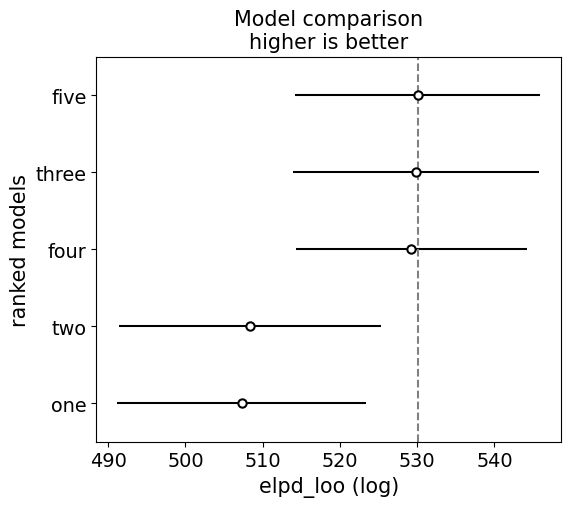

In [24]:
az.plot_compare(cmp_df)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to this metric, the best model is number 5 which included the predictors free throw percentage, position, and 3 point attempts with an interaction between 3 point attempts and postion. It considers this one the best model because it has the most positive elpd_loo. 3, 4, and 5 are very similar, but 5 is just barely more positive. This is likely because these models include some interaction, while models 1 and 2 don't.